<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Credit-Card-Fraud-Detection/blob/main/CreditCardFraudDetectionDASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALLING PACKAGES

In [ ]:
!pip install --upgrade keras
!pip install -q tensorflow==2.0beta1

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)
     |████████████████████████████████| 87.9MB 43kB/s 
     |████████████████████████████████| 501kB 47.2MB/s 
     |████████████████████████████████| 3.1MB 41.9MB/s 


#LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [ ]:
import dask.dataframe as dd

#IMPORTING DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
path = '/content/drive/My Drive/CreditCardFraud/creditcard.csv'
data = dd.read_csv(path)

In [ ]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470400,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125894,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624502,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108301,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095922,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#DATA VISUALIZATION

In [ ]:
print(data.shape)
data.describe()

(Delayed('int-f051ce99-1eda-464f-8baa-e1716c7b6042'), 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
data.compute()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470400,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125894,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624502,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108301,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095922,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77639,172786,-11.881118,10.071785,-9.834784,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
77640,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068473,-0.053527,24.79,0
77641,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296826,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329283,0.140716,0.313502,0.395653,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
77642,172788,-0.240440,0.530482,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509929,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546669,0.108821,0.104533,10.00,0


In [ ]:
import dask.array as da

da.histogram(data, bins=100)

ValueError: ignored

In [ ]:
data['Class'].value_counts()

"""
OR  print(data.groupby('Class').size())"""

"\nOR  print(data.groupby('Class').size())"

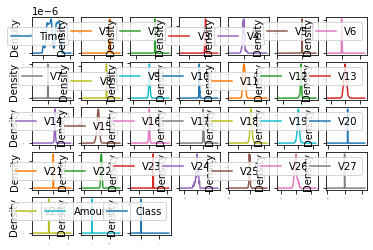

In [ ]:
data.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=True, fontsize=1)
plt.show()

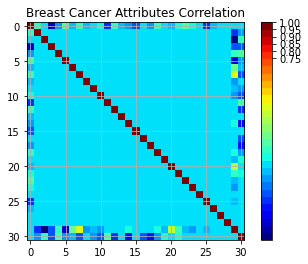

In [ ]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(data.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


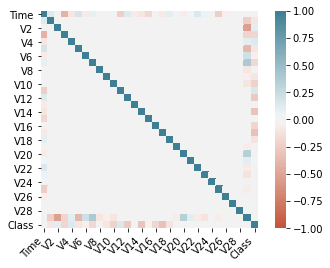

In [ ]:
import seaborn as sns

corr = data.corr()
ax = sns.heatmap(corr, vmin =- 1, vmax = 1, center = 0, 
                  cmap = sns.diverging_palette(20, 220, n=200),
                  square = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

#DATA SPLITTING

In [ ]:
Y = data['Class'].values
X = data.drop('Class', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [ ]:
print("X_train.shape: ",X_train.shape, "X_test.shape: ",X_test.shape,"Y_train.shape: ", Y_train.shape, "Y_test.shape: ",Y_test.shape)

X_train.shape:  (227845, 30) X_test.shape:  (56962, 30) Y_train.shape:  (227845,) Y_test.shape:  (56962,)


#ENSEMBLE MODELLING USING CROSS VALIDATION

In [ ]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

In [ ]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits = num_folds)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = 'accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

CART: 0.999144 (0.000204) (run time: 218.948166)
SVM: 0.998319 (0.000294) (run time: 139.977868)
NB: 0.993482 (0.000681) (run time: 1.338509)
KNN: 0.998416 (0.000272) (run time: 32.293812)


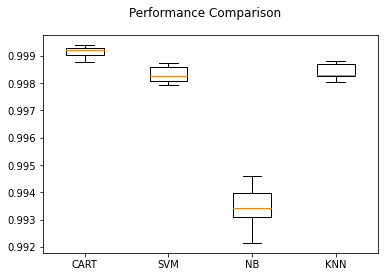

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#PIPELINING

In [ ]:
import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
                                                                        DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
                                                                      GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
                                                                       KNeighborsClassifier())])))
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#SVM

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
SVM = SVC(C=2.0, kernel='rbf')
start = time.time()
SVM.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

In [ ]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
SVM_pred = SVM.predict(X_test_scaled)

In [ ]:
print(confusion_matrix(Y_test, SVM_pred))

In [ ]:
accuracy = accuracy_score(Y_test, SVM_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, SVM_pred))
print(classification_report(Y_test, SVM_pred))

"""
Accuracy score 0.991228
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114
"""

#NB

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,Y_train)

In [ ]:
NB_pred = NB.predict(X_test)


In [ ]:
NB.score(X_test, Y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, NB_pred)
print(cm)

In [ ]:
accuracy = accuracy_score(Y_test, NB_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, NB_pred))
print(classification_report(Y_test, NB_pred))

"""
Accuracy score 0.903509
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114
"""

#DT

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [ ]:
print(X.shape)
print(Y.shape)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT.fit(X_train,Y_train)

In [ ]:
DT_pred = DT.predict(X_test)
print(Y_test)
print(Y_pred)

In [ ]:
DT.score(X_test, Y_test)
DT.fit(X_test,Y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, DT_pred)
print(cm)

In [ ]:
accuracy = accuracy_score(Y_test, DT_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, DT_pred))
print(classification_report(Y_test, DT_pred))

"""
Accuracy score 0.929825
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114
"""

In [ ]:
!pip install pydotplus

In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [ ]:
dot_data = StringIO()
filename = "creditcardfraudtree.png"
featureNames = data.columns[:-1]
targetNames = data["Class"].unique().tolist()
out=tree.export_graphviz(DT_classifier,feature_names=featureNames, out_file=dot_data, class_names= np.unique(Y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

#DECISON TREE BAGGING

In [ ]:
from sklearn.ensemble import BaggingClassifier
Bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)

In [ ]:
Bagging.fit(X_train, Y_train)
B_pred = Bagging.predict(X_test)
print(Y_test, B_pred)

In [ ]:
Bagging.score(X_test, Y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, B_pred)
print(cm)

In [ ]:
accuracy = accuracy_score(Y_test, B_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, B_pred))
print(classification_report(Y_test, B_pred))

"""
Accuracy score 0.929825
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114
"""

#EXTRA TREE CLASSFIER

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ET = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

ET.fit(X_train, Y_train)
ET.score(X_train, Y_train)

ET_pred = ET_Classifier.predict(X_test)
ET.score(X_test, Y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, ET_pred)
print(cm)

In [ ]:
accuracy = accuracy_score(Y_test, ET_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, ET_pred))
print(classification_report(Y_test, ET_pred))

"""
Accuracy score 0.929825
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114
"""

#RF

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion='entropy', random_state=0)
RF.fit(X_train,Y_train)
RF_pred = RF.predict(X_test)
RF.score(X_test, Y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, RF_pred)
print(cm)

In [ ]:
accuracy = accuracy_score(Y_test, RF_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, EF_pred))
print(classification_report(Y_test, EF_pred))

"""
Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114
"""

#GRADIANT DESCENT CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GB.fit(X_train, Y_train)

GB_pred = GBClassifier.predict(X_test)
GB.score(X_test, Y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, GB_pred)
print(cm)

In [ ]:
accuracy = accuracy_score(Y_test, GB_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, GB_pred))
print(classification_report(Y_test, GB_pred))

"""
Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114
"""

#XGBOOST

In [ ]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
import xgboost

XGB = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)
XGB.fit(X_train, Y_train , verbose=False)

XGB_pred = XGB.predict(X_test)

In [ ]:
XGBPred = []
for i in XGB_pred:
  for k in i:
    XGBPred.append(str(int(k)))

XGBPred = np.array(XGBPred)
XGBPred

In [ ]:
accuracy = accuracy_score(Y_test, XGBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, XGBPred))
print(classification_report(Y_test, XGBPred))

"""
Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114
"""

#ADABOOST

In [ ]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADABoost = AdaBoostClassifier()
ADABoost.fit(X_train, Y_train)

ADAB_pred = ADABoost.predict(X_test)

In [ ]:
ADABPred = []
for i in ADAB_pred:
  for k in i:
    ADABPred.append(str(int(k)))

ADABPred = np.array(ADABPred)
ADABPred

In [ ]:
accuracy = accuracy_score(Y_test, ADABPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, ADABPred))
print(classification_report(Y_test, ADABPred))

"""
Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114
"""

#ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow import keras

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test =sc_X.transform(X_test)

In [ ]:
model = Sequential()

model.add(Dense(units = 30, activation = 'relu', input_shape=(30,)))

model.add(Dense(units = 15, activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 30, nb_epoch = 1000)

In [ ]:
Y_pred = model.predict(X_test)

#Array of list of list to Array of list
Y_new = []
for i in Y_pred:
  for k in i:
    Y_new.append(str(int(k)))
  
Y_new = np.array(Y_new, dtype = object) 

#PRINT
#Y_test, Y_new

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_new)
print(cm)

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_new))
print(classification_report(Y_test, Y_new))

"""
CASE 1: 
Layer 1 : unit = 10
Layer 2 : unit = 5
Layer 3 : unit = 1
Batch_size = 10, nb_epoch = 100
Accuracy score 0.0.859649

CASE 2: 
Layer 1 : unit = 30
Layer 2 : unit = 15
Layer 3 : unit = 1
Batch_size = 10, nb_epoch = 100
Accuracy score 0.956140

CASE 3: 
Layer 1 : unit = 30
Layer 2 : unit = 15
Layer 3 : unit = 1
Batch_size = 15, nb_epoch = 100
Accuracy score 0.964912 

CASE 4: 
Layer 1 : unit = 30
Layer 2 : unit = 15
Layer 3 : unit = 1
Batch_size = 30, nb_epoch = 100
Accuracy score 0.964912 

CASE 5: 
Layer 1 : unit = 30
Layer 2 : unit = 15
Layer 3 : unit = 1
Batch_size = 30, nb_epoch = 1000
Accuracy score 0.964912 

CASE 6: 
Layer 1 : unit = 30
Layer 2 : unit = 20
Layer 3 : unit = 10
Layer 4 : unit = 1
Batch_size = 30, nb_epoch = 100
Accuracy score 0.964912 

CASE 7:
model = Sequential()
model.add(Dense(units = 30, activation = 'relu', input_shape=(30,)))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 30, nb_epoch = 1000)

Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.92      0.96        39

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

CASE 8:
model = Sequential()
model.add(Dense(units = 30, activation = 'relu', input_shape=(30,)))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 30, nb_epoch = 1000)


Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114
"""

************************************************************************

#Deep Learning

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test =sc_X.transform(X_test)

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(units = 455, activation = 'relu', input_shape=(30,)))

# The Hidden Layers :
NN_model.add(Dense(200, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))
/
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

checkpointer = ModelCheckpoint(filepath='weights.best.cnn.hdf5', verbose=1, save_best_only=True) 

In [ ]:
NN_model.fit(X_train, Y_train, epochs=1000, batch_size=30, validation_split = 0.2, callbacks=callbacks_list)

In [ ]:
#NN_model.load_weights('weights.best.cnn.hdf5')

In [ ]:
#wights_file = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
#NN_model.load_weights(wights_file) 
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
DL_pred = model.predict(X_test)

#Array of list of list to Array of list
DLPred = []
for i in DL_pred:
  for k in i:
    DLPred.append(str(int(k)))
  
DLPred = np.array(DLPred, dtype = object) 

#PRINT
#Y_test, Y_new

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, DLPred)
print(cm)

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, DLPred))
print(classification_report(Y_test, DLPred))

"""
CASE 1:
#The Input Later
NN_model.add(Dense(units = 100, activation = 'relu', input_shape=(30,)))

# The Hidden Layers :
NN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(10, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

#RESULT: 
Epoch 00500: val_loss did not improve from 0.00001
Accuracy score 0.964912

CASE 2:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(units = 455, activation = 'relu', input_shape=(30,)))

# The Hidden Layers :
NN_model.add(Dense(200, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))
/
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

NN_model.fit(X_train, Y_train, epochs=1000, batch_size=30, validation_split = 0.2, callbacks=callbacks_list)

Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.92      0.96        39

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

CASE 3:

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(units = 455, activation = 'relu', input_shape=(30,)))

# The Hidden Layers :
NN_model.add(Dense(200, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

NN_model.fit(X_train, Y_train, epochs=1000, batch_size=30, validation_split = 0.2, callbacks=callbacks_list)

Epoch 01000: val_loss did not improve from 0.00000

Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114
"""